# TD 3 : Le modèle Leaky Integrate-and-Fire (LIF)
---

In [1]:
# import necessary modules for numerics and plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Le modèle Integrate-and-Fire 

La dynamique sous-seuil d'un neurone "Integrate-and-Fire" est décrit par l'équation 
$$\tau \frac{dV}{dt} = -V + RI.$$
Ici, $V$ est le potentiel de la membrane, $\tau$ est la constante de temps de la membrane, $R$ la résistance d'entrée, et $I$ représente un courant injecté dans le neurone. Pour faire simple, tous les potentiels sont mésurés rélatif au potentiel de repos $E_L$, qui pour cette raison n'apparaît plus dans l'équation. 

Chaque fois que le potentiel excède un seuil $V_{\rm seuil}$, on considère que le neurone emet un potentiel d'action, et le potentiel membranaire est remis à une valeur de "reset", $V\to V_{\rm reset}$.

Considérons les paramètres suivants : $\tau=20$ ms et $R=1$ MOhm pour la dynamique sous-seuil, et $V_{\rm seuil}=20$ mV avec $V_{\rm reset}=0$ mV pour le mécanisme de décharge. 

Remarque : Si nous allons spécifier le courant $I$ en nA, nous pouvons calculer le produit $R*I$ sans dévoir transformer des unités, puisque MOhm x nA = mV. 



## E1.1 Solution analytique de la dynamique sous-seuil du modèle Integrate-and-Fire

Quel est le potentiel de la membrane stationnaire - ou le point fixe - pour $t\rightarrow \infty$ si on considère *uniquement la dynamique sous-seuil* spécifiée ci-dessus, c'est-à-dire en faisant abstraction du mécanisme de décharge ? 

Vérifiez que $$V(t) = RI + (V_0 - RI) \exp(-t/\tau)$$ est une solution de l'équation différentielle donnée plus haut, avec la condition initiale $V(t=0) = V_0$ et si on considère que le courant $I$ est constant dans le temps. 

**Indice**: Rappelez-vous que $\frac{d}{dt} \left( e^{f(t)} \right) = e^{f(t)} \frac{df(t)}{dt}$

In [2]:
# calcul et réponses sur papier

**Solution :** 
$\begin{aligned}
\frac{dV}{dt} &= \frac{d}{dt} \left[RI + (V_0-RI) e^{-t/\tau}\right] \\ 
&= (V_0-RI)\frac{d}{dt}  e^{-t/\tau} \\
&= -(V_0-RI)\frac{e^{-t/\tau}}{\tau}  \\
&= \frac{-V(t)+RI}{\tau}
\end{aligned}$


In [3]:
# Plottez la solution pour les paramètres données plus haut 
# et la valeur initiale V0 = Vreset

R = 1. # MOhm
tau = 20. # ms

Vseuil = 20. # mV
Vreset = 0. # mV


V0 = Vreset

def Vs(t, I):
    return R*I + (V0-R*I)*np.exp(-t/tau)


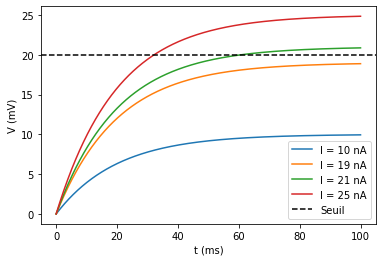

In [4]:
T = 100 # ms
dt = 0.1 # ms
t = np.arange(0,T,dt)
nt = len(t)

I = 10. # nA
fig, ax = plt.subplots()
for I in [10, 19, 21, 25]:
    ax.plot(t, Vs(t, I), label='I = %g nA'%I)
ax.axhline(Vseuil, c='k', ls='--', label='Seuil')
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
ax.legend()

## E1.2 L'activité de décharge du neurone Integrate-and-Fire

Dans le modèle Integrate-and-Fire, un potentiel d'action est déclenché lorsque le potentiel de membrane atteint un seuil $V_{\rm seuil}$. Le potentiel est remis à $V \rightarrow V_{\rm reset}$ après le potentiel d'action. 

**Dans quelle condition, c'est-à-dire pour quel courant injecté, le neurone déclenche-t-il des potentiels d'action ?**

Veuillez dériver l'expression analytique du taux de décharge $f(t)$ en fonction de l'input externe $I$. 

**Indice :** Calculez d'abord combien de temps $T$ il faut pour passer de $V(t=0)=V_{\rm reset}$ à $V(T)=V_{\rm seuil}$. Ce temps $T$ entre deux spikes dépend du courant injecté, $T=T(I)$. Le taux de décharge en fonction de l'input est alors donné par $f(I) = 1/T(I)$. Tracez le taux de décharge $f$ en fonction de l'entrée $I$.

In [5]:
# calcul et réponses sur papier

**Solution :** 

$\begin{aligned}
V_{\rm seuil} &= V(T)  \\ 
&=  RI + (V_{\rm reset} - RI)e^{-T/\tau} \end{aligned} $


$\begin{aligned}
V_{\rm seuil} &=  RI + (V_{\rm reset} - RI)e^{-T/\tau} \\
\Leftrightarrow\ \ V_{\rm seuil} - RI &=  (V_{\rm reset} - RI)e^{-T/\tau} \\
\Leftrightarrow\ \ \frac{V_{\rm seuil} - RI}{V_{\rm reset} - RI} &=  e^{-T/\tau} \\
\Leftrightarrow\ \ \ln{\frac{V_{\rm seuil} - RI}{V_{\rm reset} - RI}} &=  -\frac{T}{\tau} \\
\Leftrightarrow\ \ T &= \tau \ln\left(\frac{V_{\rm reset} - RI}{V_{\rm seuil} - RI}\right) \\
\\
\Rightarrow\ \ f(I) &= \frac{1}{\tau \ln\left(\frac{V_{\rm reset} - RI}{V_{\rm seuil} - RI}\right)}   
\end{aligned} $

/Users/jranft/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/jranft/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/jranft/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


Text(0, 0.5, 'f (Hz)')

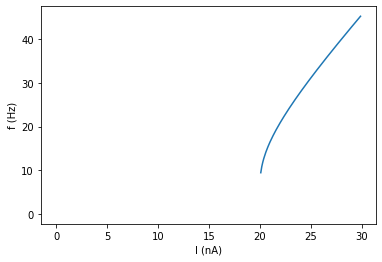

In [6]:
# Plottez la courbe f-I du LIF avec 
# les paramètres choisis

def fI(I):
    T = tau*np.log((Vreset-R*I)/(Vseuil-R*I))
    return 1e3/T # in Hz


Is = np.arange(0,30,0.1) # nA

fig, ax = plt.subplots()
ax.plot(Is, fI(Is))
ax.set_xlabel('I (nA)')
ax.set_ylabel('f (Hz)')



In [7]:
fI(Is) # --> nan = "Not a number", représantant une valeur numérique mal définie

/Users/jranft/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/jranft/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/jranft/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


array([-0.        ,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      

/Users/jranft/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


Text(0, 0.5, 'f (Hz)')

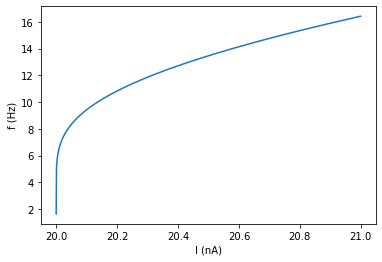

In [8]:
Is = np.arange(19,21,0.001) # nA

fig, ax = plt.subplots()
ax.plot(Is, fI(Is))
ax.set_xlabel('I (nA)')
ax.set_ylabel('f (Hz)')

**Remarque :** Contrairement au modèle de FitzHugh-Nagumo étudié dans le DM2, la fréquence de décharge peut dévenir arbitrairement petit très près de la valeur critique de $I$, $I_{\rm crit} = V_{\rm seuil}/R$, mais la fréquence croit très rapidement avec $I$ près de $I_{\rm crit}$.

## Bonus : E1.3 Neurone Integrate-and-Fire avec période refractaire

Considérons maintenant un neurone avec une période réfractaire : Dans cette modification du modèle, le neurone n'intégre pas d'inputs pendant une période brève après l'émission d'un spike, similaire aux vrais neurones. Supposons que la période réfractaire dure un temps $D$. Comment le taux de décharge $f(I)$ change-t-il avec une période réfractaire de $D=5$ ms ? Quelle est la nouvelle expression pour $f(I)$ ? Tracez $f$ en fonction de $I$. 

**Remarque :** La dynamique sous-seuil, une fois la période refractaire passée, est identique au cas sans période refractaire, c'est-à-dire n'est pas modifiée, et un spike est toujours déclenché quand $V>V_{\rm seuil}$.

**Indice :** Dessinez d'abord un croquis de la dynamique du potentiel membranaire pour avoir une meilleure idée de la façon dont $D$ affecte $T$. 

In [ ]:
# calcul et réponses sur papier

**Réponse :**

$\begin{aligned}T_{\rm avec} &= T_{\rm sans} + D \\
\Rightarrow\ \ f_{\rm avec}(I) &= \frac{1}{T_{\rm avec}} \\
 &= \ldots  
\end{aligned}$


In [ ]:
# Plottez la courve f-I pour le paramètres choisis
# pour D=0 ms (le cas avant, sans période réfractaire)
# et D=5 ms.

## E1.4 Intégration numérique du modèle Integrate-and-Fire (avec décharge !)

La semaine précédente, nous avons utilisé la méthode d'Euler pour résoudre des équations différentielles. Nous pouvons utiliser cette même technique pour résoudre la dynamique sous-seuil d'un neurone LIF (Leaky Integrate-and-Fire), en rajoutant un mécanisme de détection de spike et de reset.


In [9]:
# Discretization of time
T = 500 # ms
dt = 0.1
t = np.arange(0,T,dt)
nt = len(t)

In [10]:
# Definition of the dynamics
# (function returning dV/dt)
def f(v,I):
    return (R*I - v)/tau


In [14]:
# Iterative integration of 
# the subthreshold dynamics,
# COMBINED WITH threshold
# crossing detection!

I = 22 # nA

V = np.zeros(nt)
V[0] = Vreset

spiketimes = []

for i in range(nt-1):
    # intégration Euler
    V[i+1] = V[i] + dt*f(V[i],I)
    
    # détection si le potentiel
    # a franchi le seuil
    if V[i+1] > Vseuil:
        V[i+1] = Vreset
        spiketimes.append(t[i])


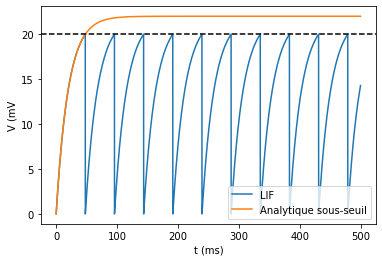

In [15]:
fig, ax = plt.subplots()
ax.plot(t, V, label='LIF')
ax.plot(t, Vs(t,I), label='Analytique sous-seuil')
ax.axhline(Vseuil, c='k',ls='--')
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV')
ax.legend()

In [16]:
print('Spiketimes:', spiketimes)
print('Taux de décharge (Hz):', 1000*len(spiketimes)/T)
print('Prédiction (Hz):', fI(I))

Spiketimes: [47.800000000000004, 95.7, 143.6, 191.5, 239.4, 287.3, 335.20000000000005, 383.1, 431.0, 478.90000000000003]
Taux de décharge (Hz): 20.0
Prédiction (Hz): 20.851619571212314


In [18]:
# calcul des ISI (intervalles inter-spikes)
isis = np.diff(spiketimes)
print(isis)

# calcul du CV (voir diapos du cours)
isi_mean = np.mean(isis) # ms
isi_std = np.std(isis) # ms
print('CV = ', isi_std/isi_mean)

[47.9 47.9 47.9 47.9 47.9 47.9 47.9 47.9 47.9]
CV =  4.1073147143270285e-16


# 2. Décharge irrégulière dans le modèle Integrate-and-Fire

Ajoutons une entrée de bruit à l'équation du neurone Integrate-and-Fire ci-dessus
$$\tau \frac{dV}{dt} = -V + RI + \sigma \sqrt{\tau} \xi(t),$$
où $\sigma$ détermine l'amplitude du bruit et $\xi(t)$ est un processus de bruit blanc gaussien avec une densité de variance unitaire et moyenne zéro. Avec le terme de bruit, c'est désormais une _**équation différentielle stochastique**_.

Le terme de bruit peut par ex. représenter :     
* la stochasticité d'ouverture et de fermeture des canaux ioniques,
* le bruit synaptique (fiabilité de la transmission synaptique),
* les entrées synaptiques externes (inconnues et/ou variables entre les essais).

 
Dans la forme discrétisée telle que nous l'utilisons pour la méthode d'Euler, l'équation devient

$\begin{aligned}
V_{i+1} &= V_i + \Delta t \left[\left(\frac{dV}{dt}\right)_{\rm det}(V_i, t_i) + \sigma\sqrt{\frac{1}{\Delta t \tau}} \eta_i\right] \\
&= V_i + \Delta t \left[\frac{-V_i + RI}{\tau} + \sigma\sqrt{\frac{1}{\Delta t \tau}} \eta_i\right]
\end{aligned}$

où le premier terme $\left(\frac{dV}{dt}\right)_{\rm det}$ -- évalué à $t_i$ -- représente la dynamique déterministe du LIF, tandis que la stochasticité vient du deuxième terme, où $\eta_i$ est un nombre aléatoire tiré d'une distribution Gaussienne normalisée, avec moyenne zéro et écart-type 1. 

**Indice :** Tirez des nombres aléatoires Gaussiens avec `np.random.normal()`. 


In [ ]:
print(np.random.normal())

-0.10572635489613966


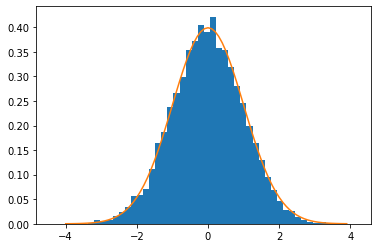

In [ ]:
many_random_numbers = np.random.normal(size=10000)

fig, ax = plt.subplots()
ax.hist(many_random_numbers, bins=50, density=True)
x = np.arange(-4,4,0.1)
ax.plot(x, np.exp(-x**2/2)/np.sqrt(2*np.pi))


## E2.1 Intégration numérique d'une équation différentielle stochastique : LIF avec  bruit

Écrivez un schéma d'intégration numérique de l'équation différentielle ci-dessus. Utilisez la méthode Euler avec un largeur de pas de temps de $0.1$ ms et intégrez pendant 20 secondes. Enregistrez les temps de spikes et calculez le coefficient de variation après l'intégration. Essayez d'obtenir un $CV$ de 1 à un taux de décharge de 1 spk/sec en variant $I$ et $\sigma$. Tracer le potentiel de la membrane pendant une période de 20 sec. Inspectez l'histogramme de la distribution ISI.  

In [ ]:
# Code pour l'intégration Euler
#I  = ...
#sigma = ...

I = 19 # nA -> sous la valeur critique !
sigma = 2 # mV

T = 500 # ms
dt = 0.1
t = np.arange(0,T,dt)
nt = len(t)

V = np.zeros(nt)

spiketimes = []

for i in range(nt-1):
    # deterministic part
    V[i+1] = V[i] + dt*f(V[i],I)

    # noisy contribution
    V[i+1] += np.sqrt(dt/tau)*sigma*np.random.normal()

    if V[i+1] > Vseuil:
        V[i+1] = Vreset
        spiketimes.append(t[i])

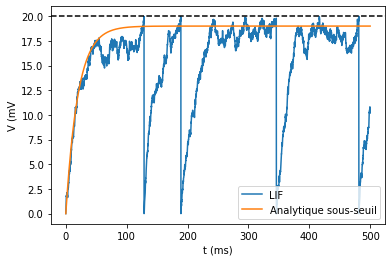

In [ ]:
# Plottez le potentiel de membrane V(t)
# avec les spikes superposés pour les
# valeurs de I et de sigma choisies

fig, ax = plt.subplots()
ax.plot(t, V, label='LIF')
ax.plot(t, Vs(t,I), label='Analytique sous-seuil')
ax.axhline(Vseuil, c='k',ls='--')
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV')
ax.legend()

In [ ]:
# Calculez le CV
print('Spiketimes:', spiketimes)
print('Taux de décharge (Hz):', 1000*len(spiketimes)/T)
print('Prédiction (Hz):', fI(I))

isis = np.diff(spiketimes)
print(isis)
isi_mean = np.mean(isis) # ms
isi_std = np.std(isis) # ms
print('CV = ', isi_std/isi_mean)

Spiketimes: [128.5, 189.0, 345.70000000000005, 481.20000000000005]
Taux de décharge (Hz): 8.0
Prédiction (Hz): nan
[ 60.5 156.7 135.5]
CV =  0.35103446048203396
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
